In [42]:
import cv2
import numpy as np
import joblib
import matplotlib.pyplot as plt
from PIL import Image
import PIL
%matplotlib inline
import torch
from torchvision import datasets, models, transforms
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [43]:
def app(dirPhoto,dirModel):
    img =imgp= Image.open(dirPhoto).convert("RGB")
    x,y=img.size
    pix = img.load()
    clf = joblib.load(dirModel) #load model with pretrained weights
    list_of_colors = [[4,86,22], [4,50,14], [128,128,128],[168, 125, 50],[50, 149, 168]] #set colors for final representation
    pixel=[]
    template=np.zeros( (x,y), dtype=np.uint8 ) #model before single pixels deletion
    template_final=np.zeros( (x,y), dtype=np.uint8 ) #model after single pixels deletion
    for i in range (0,x,1):
        for j in range (0,y,1): 
            pixel.append(pix[i,j])
    output=clf.predict(pixel) #fiting list to the model
    iterator=0
    for i in range (0,x,1):
        for j in range (0,y,1):              #converting list to array of x rows and y columns (picture width and height)
            template[ i, j]=output[iterator]
            iterator+=1
    step=1 #radius of neighbours taken
    temp=np.zeros(5)
    for i in range (0,x,1):
        for j in range (0,y,1):
            for i2 in range (max(i-step,0),min(i+step,x),1):
                for j2 in range (max(j-step,0),min(j+step,y),1):
                    temp[template[i2,j2]]=temp[template[i2,j2]]+1 
            result=temp.argmax()                                        #removing single pixels
            template_final[i,j]=result
            temp=np.zeros(5)
    matrix = np.zeros( (x,y,3), dtype=np.uint8 ) #matrix after sigle pictures deletion
    matrix_test = np.ones( (x,y,3), dtype=np.uint8 ) #matrix before sigle pixels deletion
    for i in range (0,x,1):
        for j in range (0,y,1):
            matrix[i,j]=list_of_colors[template_final[i,j]]    
            matrix_test[i,j]=list_of_colors[template[i,j]]
    img = Image.fromarray(matrix)
    img=img.rotate(-90, Image.NEAREST, expand = 1)
    img= img.transpose(PIL.Image.FLIP_LEFT_RIGHT)
    plt.figure(figsize=(20,10))
    plt.imshow(img)

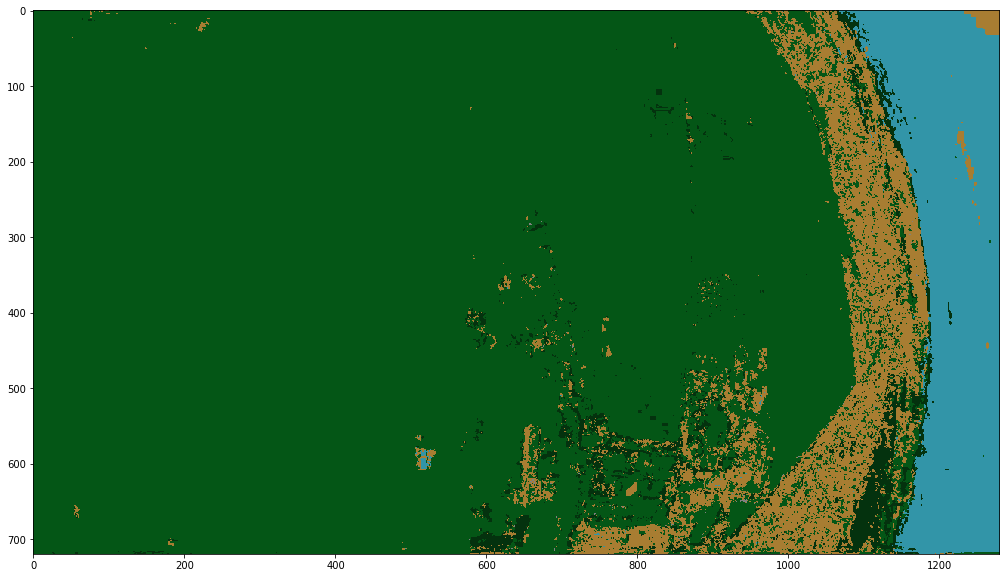

In [44]:
app("validation/1.jpg",'models/model')